In [22]:
# -*- coding: utf-8 -*-
# 物流数据始发站至目的站运单数热力图（sns.heatmap），桑基图（pyecharts.charts.Sankey）

In [1]:
# import os
import warnings
warnings.filterwarnings('ignore')  # 忽略警告提示
# import datetime
# import random
# import re
# from sqlalchemy import create_engine
import pandas as pd
pd.set_option('display.max_columns', None)  # 设置查看列不省略
# pd.set_option('display.max_rows', None)  # 设置查看行不省略
# import numpy as np
# from scipy import stats
# from scipy import special
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import seaborn as sns
sns.set_style('darkgrid')  # 风格设置di
# import missingno as msno
# import xgboost as xgb
# import lightgbm as lgb

In [2]:
df = pd.read_csv('raw_data/物流数据.csv', parse_dates=['发货时间'])

In [3]:
df

,运单编号,货运公司名称,货物名称,货物数量,货物重量,始发站：省,始发站：市,始发站：区/县,发货客户名称,发货客户手机,发货客户电话,发货客户地址（寄件地址）,发货时间,目的站：省,目的站：市,目的站：区/县,收货客户名称,收货客户手机,收货客户电话,收货客户地址（收件地址）,货物类型
0,903853006100,中通速递,NaN,0,0.0,山西省,运城市,盐湖区,肖*辉,171****5263,171****5263,工农东街3***,2019-04-14,湖北省,襄阳市,襄州区,何*,135****5888,135****5888,光彩大市场8栋3***,无
1,408435480333,中通速递,NaN,0,0.0,北京市,北京市,房山区,E*o,136****1819,802****2231,长阳镇清雅小区***,2018-12-05,北京市,北京市,顺义区,刘*,138****2494,138****2494,北务镇顺义区北务镇府前街5号（四方达***,无
2,402177236837,中通速递,NaN,0,0.0,北京市,北京市,房山区,E*o,136****1819,802****2231,长阳镇清雅小区***,2019-01-16,北京市,北京市,西城区,刘*,135****3760,135****3760,什刹海街道北京市西城区后海西***,无
3,409032866515,中通速递,NaN,0,0.0,北京市,北京市,房山区,E*O,136****1819,136****1819,清雅小区七号楼***,2018-09-07,广东省,珠海市,香洲区,段*东,185****0965,185****0965,前山街道格力电器康乐***,无
4,401901510819,中通速递,NaN,0,0.0,北京市,北京市,房山区,E*o,136****1819,802****2231,长阳镇清雅小区***,2018-11-02,河南省,开封市,龙亭区,张*,185****0819,185****0819,河南开封经济开发区集英街与汉兴路交叉口西湖翠庭1号楼1单元26楼***,无
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12101,4743852247,德邦物流,印刷品,1,3.0,浙江省,温州市,苍南县,吴*姐,150****0033,150****0033,NaN,2018-09-28,甘肃省,张掖市,山丹县,何*霞,139****6082,139****6082,NaN,纸类
12102,4462528270,德邦物流,印刷品,1,16.4,浙江省,温州市,苍南县,吴*姐,150****0033,150****0033,NaN,2018-08-24,广西壮族自治区,桂林市,灵川县,陆*松,135****9090,135****9090,NaN,纸类
12103,296026251917,顺丰快递,文件;,1,1.0,江苏省,无锡市,0,吴*杰,159****4780,159****4780,圣杨路***,2019-02-02,福建省,厦门市,0,汤*生,138****5082,138****5082,福建省厦门市同安区银湖西路3号***,纸类
12104,761856499026,顺丰快递,文件;,1,3.0,广东省,汕头市,0,刘*辉,158****3456,158****3456,金平工业区金升五***,2019-07-20,浙江省,温州市,0,李*荣,135****1282,135****1282,浙江省温州市苍南县龙港镇信用街***,纸类


In [4]:
# 对 df 使用 groupby 和 agg
agged1 = df.groupby(
    ['始发站：省', '目的站：省'],  
).agg(
    {
        '运单编号': 'count',
    }
)
agged1

# fig, axes = plt.subplots(1, 2, sharey=True)  # sharey=True -> x或y轴属性将在所有子图(subplots)中共享
# agged1.plot(figsize=(15, 5), title='agged1 title', ax=axes[0])
# agged2.plot(figsize=(15, 5), title='agged2 title', ax=axes[1])

# agged1.plot.bar(stacked=True, title='this is title')  # 堆叠柱形图


运单编号
始发站：省 目的站：省       
0     0         14
      福建省        1
上海市   上海市        1
      内蒙古自治区     1
      北京市        2
...            ...
黑龙江省  广东省        1
      河北省        1
      浙江省        4
      湖北省        1
      黑龙江省       4

[516 rows x 1 columns]

In [5]:
# df[['始发站：省', '目的站：省']][df['始发站：省'] == '黑龙江省']['目的站：省'].value_counts()

In [6]:
# agged1.loc['黑龙江省']

In [7]:
# df['始发站：省'].unique()

In [8]:
# df['目的站：省'].unique()

In [9]:
# agged1.index.get_level_values(level=0).unique()

In [10]:
se_df = pd.DataFrame(index=agged1.index.get_level_values(level=1).unique(), columns=agged1.index.get_level_values(level=0).unique())

In [11]:
se_df = se_df.fillna(0)

In [12]:
# se_df['黑龙江省'].update(agged1.loc['黑龙江省']['运单编号'])

In [13]:
for c in se_df.columns.to_list():
    se_df[c].update(agged1.loc[c]['运单编号'])

<AxesSubplot:xlabel='始发站：省', ylabel='目的站：省'>

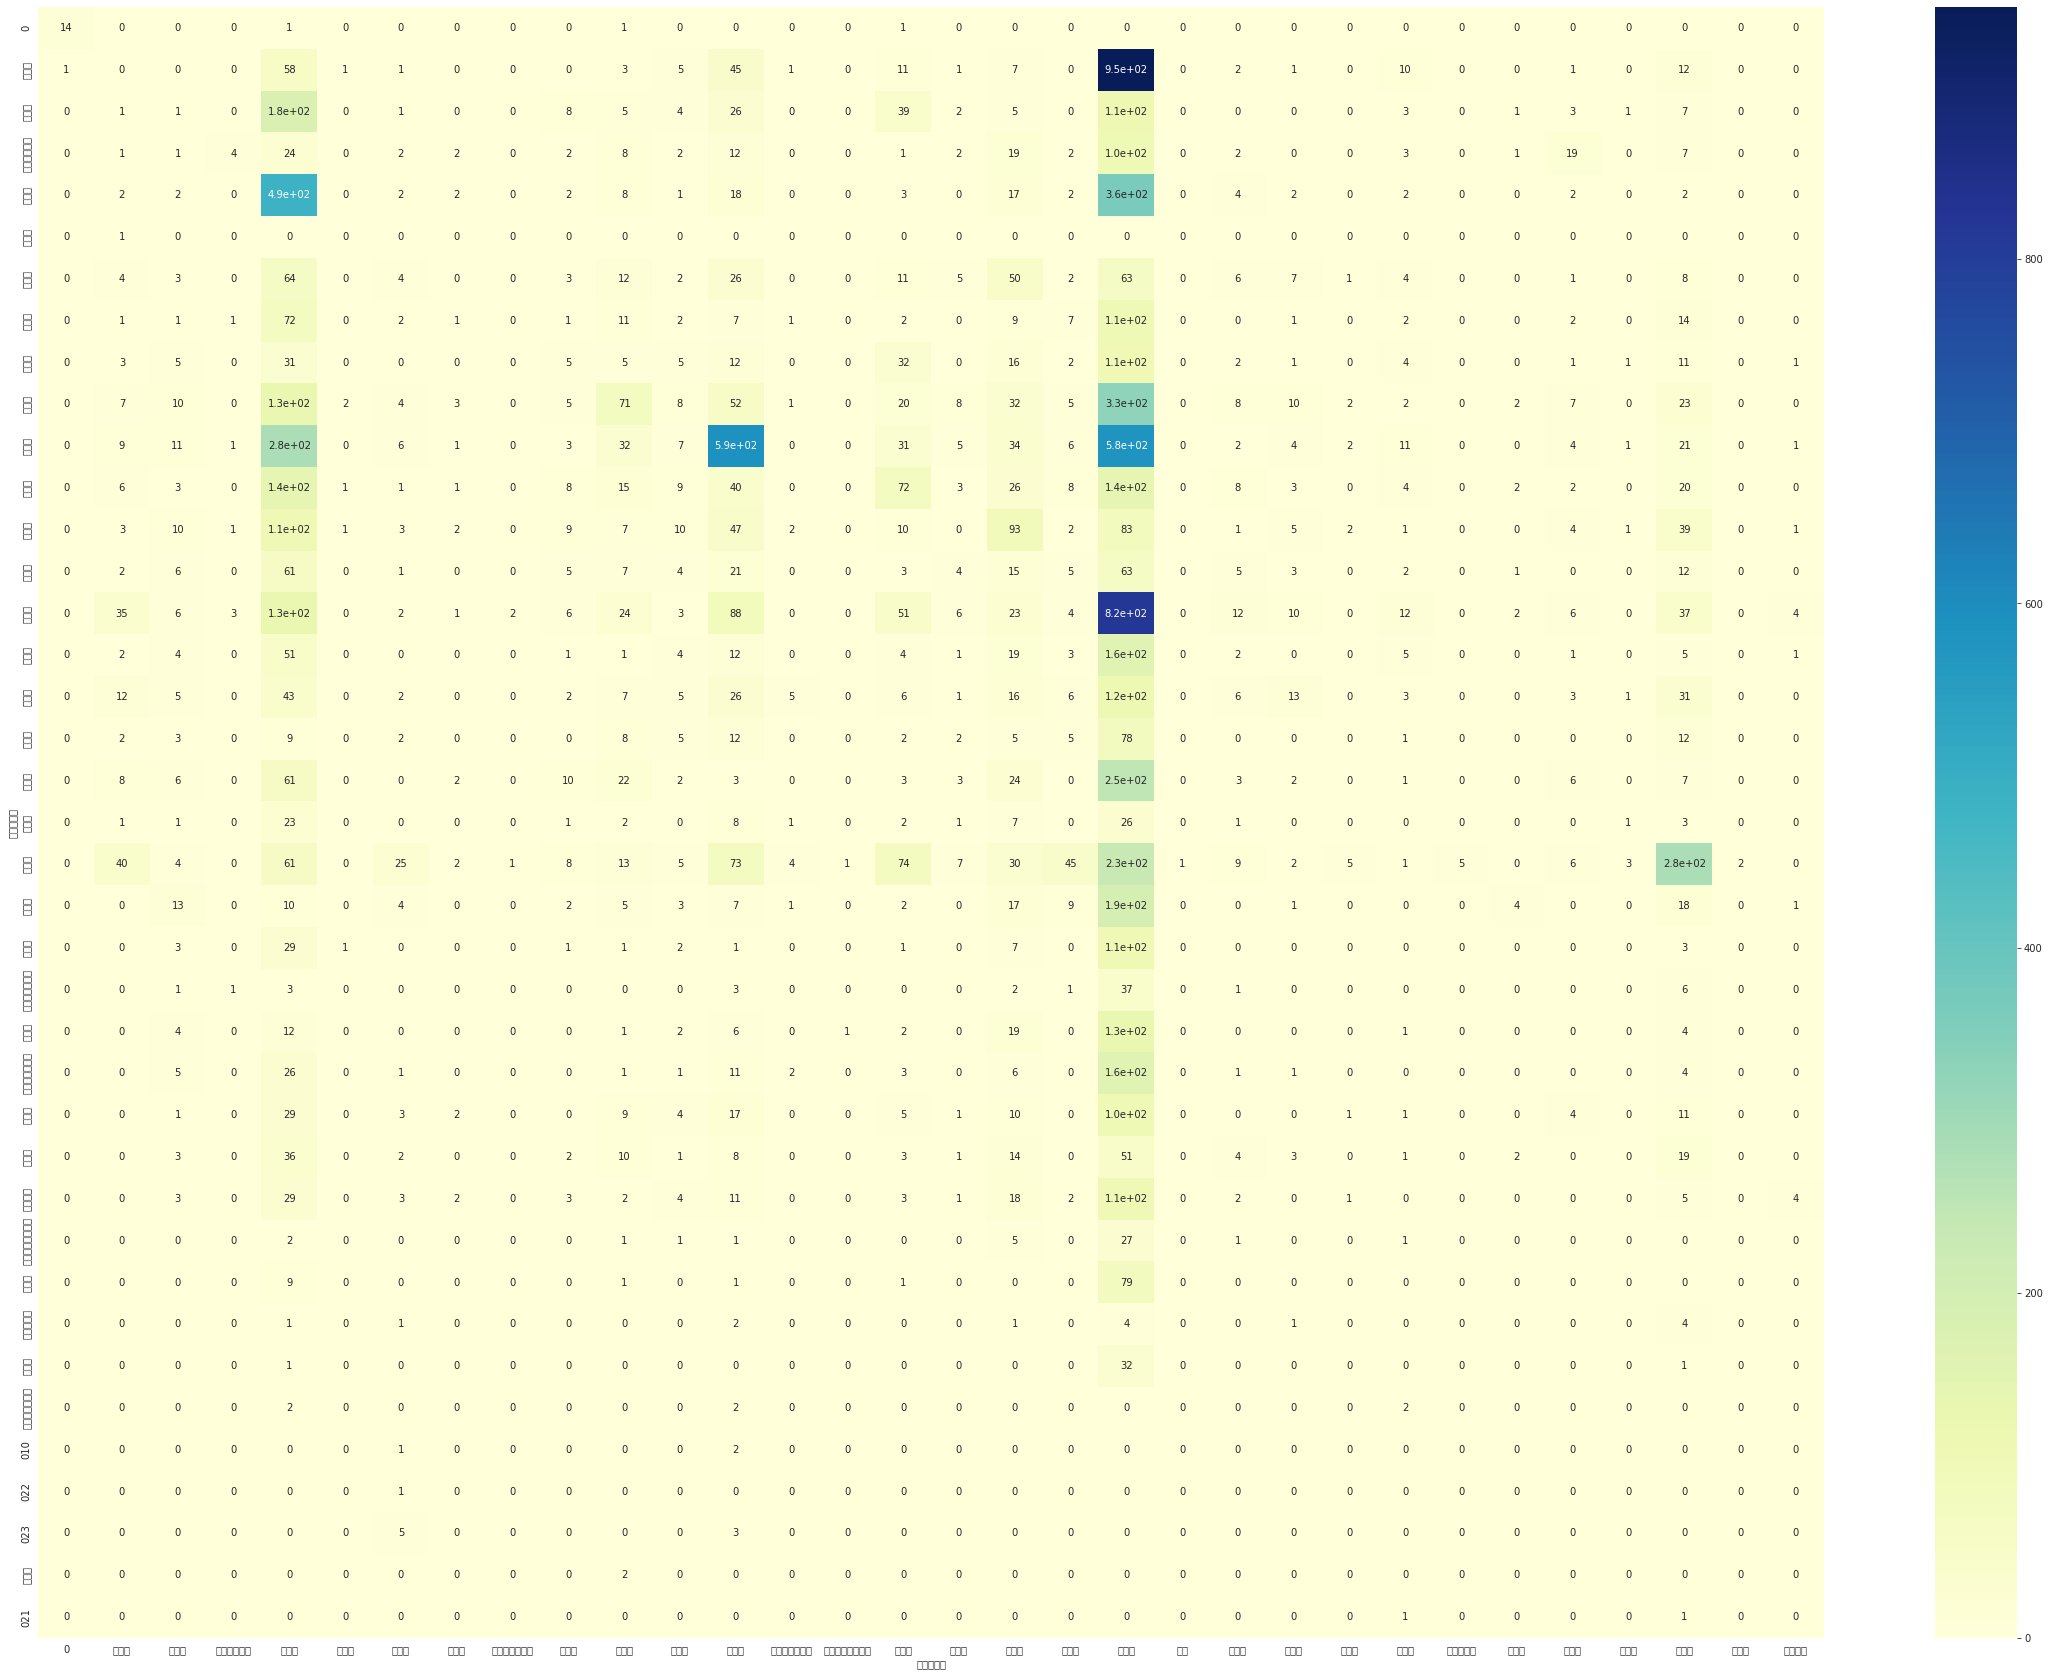

In [14]:
plt.subplots(figsize=(40, 30))
sns.heatmap(se_df, annot=True, cmap='YlGnBu')

In [15]:
# from pyecharts import options as opts
# from pyecharts.charts import Sankey


# nodes = [
#     {"name": "category1"},
#     {"name": "category2"},
#     {"name": "category3"},
#     {"name": "category4"},
#     {"name": "category5"},
#     {"name": "category6"},
# ]

# links = [
#     {"source": "category1", "target": "category2", "value": 10},
#     {"source": "category2", "target": "category3", "value": 15},
#     {"source": "category3", "target": "category4", "value": 20},
#     {"source": "category5", "target": "category6", "value": 25},
# ]
# c = (
#     Sankey()
#     .add(
#         "sankey",
#         nodes,
#         links,
#         linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5, color="source"),
#         label_opts=opts.LabelOpts(position="right"),
#     )
#     .set_global_opts(title_opts=opts.TitleOpts(title="Sankey-基本示例"))
#     .render('templates/page/render.html')
# )


In [16]:
from pyecharts import options as opts
from pyecharts.charts import Sankey

In [17]:
nodes = [
    {'name': i} for i in set(
        [m+'_始发站省' for m in df['始发站：省'].to_list()] + 
        [n+'_目的站省' for n in df['目的站：省'].to_list()]
    )
]
nodes

[{'name': '吉林省_目的站省'},
 {'name': '山西省_目的站省'},
 {'name': '上海市_目的站省'},
 {'name': '023_目的站省'},
 {'name': '内蒙古自治区_始发站省'},
 {'name': '西藏自治区_始发站省'},
 {'name': '福建省_始发站省'},
 {'name': '山东省_目的站省'},
 {'name': '山东省_始发站省'},
 {'name': '辽宁省_始发站省'},
 {'name': '广东省_始发站省'},
 {'name': '云南省_始发站省'},
 {'name': '江苏省_始发站省'},
 {'name': '河南省_始发站省'},
 {'name': '湖北省_目的站省'},
 {'name': '湖南省_目的站省'},
 {'name': '江苏省_目的站省'},
 {'name': '西藏自治区_目的站省'},
 {'name': '河北省_始发站省'},
 {'name': '北京市_始发站省'},
 {'name': '陕西省_目的站省'},
 {'name': '广西壮族自治区_目的站省'},
 {'name': '海外_始发站省'},
 {'name': '青海省_始发站省'},
 {'name': '河北省_目的站省'},
 {'name': '贵州省_目的站省'},
 {'name': '台湾省_目的站省'},
 {'name': '重庆市_始发站省'},
 {'name': '福建省_目的站省'},
 {'name': '广东省_目的站省'},
 {'name': '黑龙江省_始发站省'},
 {'name': '天津市_目的站省'},
 {'name': '河南省_目的站省'},
 {'name': '甘肃省_始发站省'},
 {'name': '贵州省_始发站省'},
 {'name': '0_始发站省'},
 {'name': '010_目的站省'},
 {'name': '青海省_目的站省'},
 {'name': '香港特别行政区_目的站省'},
 {'name': '海南省_目的站省'},
 {'name': '新疆维吾尔自治区_始发站省'},
 {'name': '吉林省_始发站省'},
 {'name': '咸阳市_目

In [18]:
# for (s, e), v in agged1.to_dict()['运单编号'].items():
#     print(s, e, v)
links = [{'source': s+'_始发站省', 'target': e+'_目的站省', 'value': v} for (s, e), v in agged1.to_dict()['运单编号'].items()]
links

[{'source': '0_始发站省', 'target': '0_目的站省', 'value': 14},
 {'source': '0_始发站省', 'target': '福建省_目的站省', 'value': 1},
 {'source': '上海市_始发站省', 'target': '上海市_目的站省', 'value': 1},
 {'source': '上海市_始发站省', 'target': '内蒙古自治区_目的站省', 'value': 1},
 {'source': '上海市_始发站省', 'target': '北京市_目的站省', 'value': 2},
 {'source': '上海市_始发站省', 'target': '咸阳市_目的站省', 'value': 1},
 {'source': '上海市_始发站省', 'target': '四川省_目的站省', 'value': 4},
 {'source': '上海市_始发站省', 'target': '天津市_目的站省', 'value': 1},
 {'source': '上海市_始发站省', 'target': '安徽省_目的站省', 'value': 3},
 {'source': '上海市_始发站省', 'target': '山东省_目的站省', 'value': 7},
 {'source': '上海市_始发站省', 'target': '广东省_目的站省', 'value': 9},
 {'source': '上海市_始发站省', 'target': '江苏省_目的站省', 'value': 6},
 {'source': '上海市_始发站省', 'target': '河北省_目的站省', 'value': 3},
 {'source': '上海市_始发站省', 'target': '河南省_目的站省', 'value': 2},
 {'source': '上海市_始发站省', 'target': '浙江省_目的站省', 'value': 35},
 {'source': '上海市_始发站省', 'target': '湖北省_目的站省', 'value': 2},
 {'source': '上海市_始发站省', 'target': '湖南省_目的站省', 'value': 12

In [21]:
sankey = (
    Sankey(
        # 初始化配置项
        init_opts=opts.InitOpts(
            width='95vw',  # 图表画布宽度
            height='95vh',  # 图标画布长度
            chart_id=None,  # 图表 ID，图表唯一标识，用于在多图表时区分
            renderer='canvas',  # 渲染风格，可选 "canvas", "svg"
            page_title="Awesome-pyecharts",  # 网页标题
            theme="dark",  # 图表主题 white dark
            bg_color=None,  # 图表背景颜色 可用颜色英文或者rgb(0,0,0)通道颜色配置
        )
    )
    .add(
        "sankey",
        nodes,
        links,
        linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5, color="source"),
        label_opts=opts.LabelOpts(position="right"),
        pos_top='20%',
        node_width=80,
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Sankey-始发站省至目的站省运单数"))
)
sankey.render('templates/page/sankey.html')

In [20]:
# # 报错：Sankey is a DAG, the original data has cycle!
# # 说明存在source==target
# for a in links:
#     if a['source'] == a['target']:
#         print(a['source'], a['target'], a['value'])